# SVM

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

import seaborn as sns
import eif as iso
import random as rn
import copy as copy

import time

In [3]:
df = pd.read_csv('imbd_log.csv')

X = df.select_dtypes(include=['number'])
X = X.drop(['averageRating'], axis = 1)
X = X.values
y = np.array(df['rating'])

## Data Partitioning

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

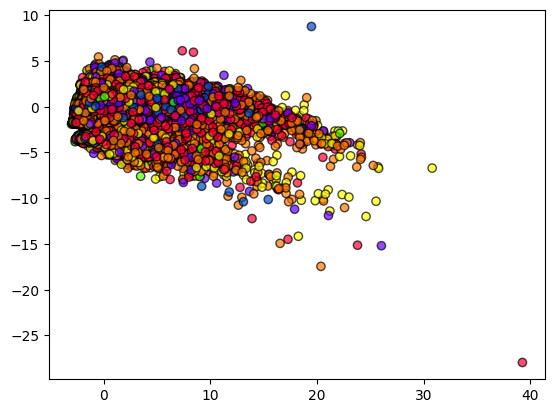

In [10]:
from sklearn.preprocessing import LabelEncoder

# Supponiamo che y_train contenga le categorie come stringhe
#y_train = np.array(['(5, 6]', '(5, 6]', '(6, 7]', ..., '(6, 7]', '(7, 8]', '(9, 10]'])

# Utilizza LabelEncoder per convertire le categorie in numeri
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)

# Ora puoi usare y_train_numeric come argomento 'c' per plt.scatter
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_numeric, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

## Linear SVM

In [11]:
from sklearn.svm import LinearSVC

### K-fold and grid search

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Definisci i parametri da ottimizzare
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Crea il modello LinearSVC
clf = LinearSVC(random_state=42)

# Configura la k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Configura la grid search
grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='accuracy')

# Esegui la grid search
grid_search.fit(X_train, y_train)

# Ottieni i migliori parametri
best_params = grid_search.best_params_
print("Migliori parametri:", best_params)

# Addestra il modello con i migliori parametri
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predici i risultati sul test set
y_pred = best_clf.predict(X_test)

# Stampa le metriche di valutazione
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, zero_division=0))

Migliori parametri: {'C': 0.001}
Accuracy 0.3521176995095854
F1-score [0.         0.         0.         0.         0.         0.02327316
 0.32747199 0.50510017 0.00090552 0.        ]
              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       142
      (2, 3]       0.00      0.00      0.00       355
      (3, 4]       0.00      0.00      0.00      1033
      (4, 5]       0.00      0.00      0.00      2726
      (5, 6]       0.26      0.01      0.02      6398
      (6, 7]       0.31      0.34      0.33     11709
      (7, 8]       0.37      0.80      0.51     14567
      (8, 9]       0.50      0.00      0.00      6620
     (9, 10]       0.00      0.00      0.00      1284

    accuracy                           0.35     44860
   macro avg       0.14      0.12      0.09     44860
weighted avg       0.31      0.35      0.25     44860



In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Definisci i parametri da ottimizzare
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Crea il modello LinearSVC
clf = LinearSVC(random_state=42)

# Configura la k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Configura la grid search
grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

# Ottieni i migliori parametri
best_params = grid_search.best_params_
print("Migliori parametri:", best_params)

# Addestra il modello con i migliori parametri
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predici i risultati sul test set
y_pred = best_clf.predict(X_test)

# Predici i risultati sul training set
y_train_pred = best_clf.predict(X_train)

# Stampa le metriche di valutazione per il training set
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print('Train Classification Report:\n', classification_report(y_train, y_train_pred, zero_division=0))

# Stampa le metriche di valutazione per il test set
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Classification Report:\n', classification_report(y_test, y_pred, zero_division=0))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Migliori parametri: {'C': 0.001}
Test Accuracy 0.3521176995095854
Test F1-score [0.         0.         0.         0.         0.         0.02327316
 0.32747199 0.50510017 0.00090552 0.        ]
Test Classification Report:
               precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       142
      (2, 3]       0.00      0.00      0.00       355
      (3, 4]       0.00      0.00      0.00      1033
      (4, 5]       0.00      0.00      0.00      2726
      (5, 6]       0.26      0.01      0.02      6398
      (6, 7]       0.31      0.34      0.33     11709
      (7, 8]       0.37      0.80      0.51     14567
      (8, 9]       0.50      0.00      0.00      6620
     (9, 10]       0.00      0.00      0.00      1284

    accuracy                           0.35     44860
   macro avg       0.14      0.12      0.09     44860
weighted avg  

## Nonlinear SVM

In [8]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [8]:
# clf = SVC(gamma='auto')
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))

In [9]:
# Crea il modello SVM con kernel RBF
model = SVC(kernel='rbf', gamma='scale')

# Addestra il modello
model.fit(X_train, y_train)

# Fai previsioni
y_pred = model.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.39210878288007134
F1-score [0.         0.         0.         0.         0.10403531 0.20545894
 0.36092006 0.53877727 0.02892562 0.004662  ]


c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       142
      (2, 3]       0.00      0.00      0.00       355
      (3, 4]       0.00      0.00      0.00      1033
      (4, 5]       0.37      0.06      0.10      2726
      (5, 6]       0.39      0.14      0.21      6398
      (6, 7]       0.39      0.34      0.36     11709
      (7, 8]       0.39      0.86      0.54     14567
      (8, 9]       0.63      0.01      0.03      6620
     (9, 10]       1.00      0.00      0.00      1284

    accuracy                           0.39     44860
   macro avg       0.32      0.14      0.12     44860
weighted avg       0.43      0.39      0.31     44860



c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# clf = SVC(gamma='auto', C=0.1, kernel='rbf', random_state=42)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))

Accuracy 0.9649122807017544
F1-score [0.9516129  0.97247706]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

